In [5]:
import os

print("Files inside dataset folder:")
print(os.listdir(path))


Files inside dataset folder:
['Titanic-Dataset.csv']


Dataset downloaded to: /kaggle/input/titanic-dataset
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4 

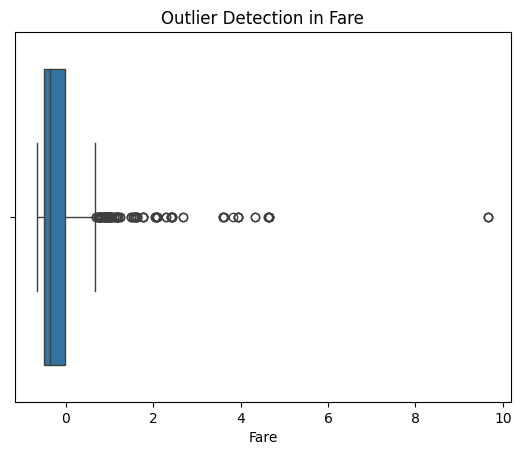

Cleaned dataset shape: (775, 13)


In [9]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub


path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Dataset downloaded to:", path)

df = pd.read_csv(f"{path}/Titanic-Dataset.csv") # Corrected filename


print(df.head())
print(df.info())
print(df.isnull().sum())


df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isnull().sum())


df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

sns.boxplot(x=df['Fare'])
plt.title("Outlier Detection in Fare")
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]

print("Cleaned dataset shape:", df.shape)